# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# To determine city based on latitude and longitude 
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for latitude and longitude and cities
lat_lngs = []
cities = []

# Create a random set of lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is not on the list, add it to the cities list 
    if city not in cities:
        cities.append(city)

# Shows how many cities are listed 
len(cities)

620

In [4]:
# Create empty lists to store the responses for the data
city_name_list = []
cloudiness_list = []
country_list =[]
date_list = []
humidity_list =[]
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [5]:
print("Beginning Data Retrieval")
print("-----------------------------")

# Save config information and build query URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For each city in cities list, print the log of each city: 
for index, city in enumerate(cities, start = 1):
    try: 
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} | {city}")
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | vaitape
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | constantine
Processing Record 5 of Set 1 | arklow
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | okhotsk
Processing Record 8 of Set 1 | shiyan
Processing Record 9 of Set 1 | anori
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | torbay
Processing Record 13 of Set 1 | eyrarbakki
Processing Record 14 of Set 1 | bloomsburg
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | esperanza
Processing Record 17 of Set 1 | stepnyak
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | isangel
City not found. Skipping...
Processing Record 21 of Set 1 

City not found. Skipping...
Processing Record 35 of Set 4 | calvinia
Processing Record 36 of Set 4 | arraial do cabo
Processing Record 37 of Set 4 | kruisfontein
Processing Record 38 of Set 4 | hithadhoo
City not found. Skipping...
Processing Record 39 of Set 4 | pahrump
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | nikolskoye
Processing Record 42 of Set 4 | mercedes
City not found. Skipping...
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | hay river
Processing Record 45 of Set 4 | saint-augustin
City not found. Skipping...
Processing Record 46 of Set 4 | lagoa
Processing Record 47 of Set 4 | awbari
Processing Record 48 of Set 4 | kavieng
City not found. Skipping...
Processing Record 49 of Set 4 | taunggyi
Processing Record 50 of Set 4 | kahului
Processing Record 0 of Set 5 | apen
City not found. Skipping...
Processing Record 1 of Set 5 | auki
Processing Record 2 of Set 5 | baiao
Processing Record 3 of Set 5 | kulachi
Processing Reco

Processing Record 17 of Set 8 | khirkiya
Processing Record 18 of Set 8 | rafaela
Processing Record 19 of Set 8 | yar-sale
Processing Record 20 of Set 8 | oskemen
City not found. Skipping...
Processing Record 21 of Set 8 | yatou
Processing Record 22 of Set 8 | cabedelo
Processing Record 23 of Set 8 | san juan
Processing Record 24 of Set 8 | nuuk
Processing Record 25 of Set 8 | kirya
Processing Record 26 of Set 8 | biak
Processing Record 27 of Set 8 | baghdad
Processing Record 28 of Set 8 | walvis bay
Processing Record 29 of Set 8 | korsakov
Processing Record 30 of Set 8 | mahibadhoo
Processing Record 31 of Set 8 | coahuayana
Processing Record 32 of Set 8 | nouadhibou
Processing Record 33 of Set 8 | katobu
Processing Record 34 of Set 8 | inhambane
Processing Record 35 of Set 8 | srivardhan
Processing Record 36 of Set 8 | kampong chhnang
Processing Record 37 of Set 8 | colares
City not found. Skipping...
Processing Record 38 of Set 8 | pathein
Processing Record 39 of Set 8 | labuhan
Proce

Processing Record 1 of Set 12 | atar
Processing Record 2 of Set 12 | ishikawa
Processing Record 3 of Set 12 | melfi
Processing Record 4 of Set 12 | acarau
Processing Record 5 of Set 12 | yangambi
Processing Record 6 of Set 12 | mecca
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a panda data frame for the data retrieved
weather_df = pd.DataFrame({"City": city_name_list,
                          "Lat": lat_list, "Lng": lng_list, "Max Temp": max_temp_list,
                          "Humidity": humidity_list, "Cloudiness": cloudiness_list,
                          "Wind Speed": wind_speed_list, "Country": country_list, "Date": date_list})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Airai,-8.93,125.41,74.64,37,36,3.09,TL,1603065704
1,Vaitape,-16.52,-151.75,80.64,75,63,7.49,PF,1603065705
2,Mataura,-46.19,168.86,51.01,92,100,8.99,NZ,1603065705
3,Constantine,36.37,6.61,48.20,76,32,3.36,DZ,1603065705
4,Arklow,52.79,-6.14,50.00,95,88,1.99,IE,1603065705


In [7]:
# Generate descriptive stats for each of the columns 
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,18.188765,20.768325,61.204480,73.077601,53.188713,7.753280,1.603066e+09
std,32.703456,92.687796,20.076663,21.151923,37.956010,5.582612,7.153733e+01
min,-54.800000,-175.200000,7.090000,8.000000,0.000000,0.220000,1.603065e+09
25%,-8.225000,-59.260000,46.110000,63.000000,16.000000,3.360000,1.603066e+09
50%,20.880000,26.690000,66.000000,78.000000,61.000000,6.690000,1.603066e+09
75%,45.770000,102.740000,78.145000,89.000000,90.000000,11.140000,1.603066e+09
max,78.220000,179.320000,102.000000,100.000000,100.000000,50.550000,1.603066e+09


In [8]:
# Export the data into a csv in output_data folder
weather_df.to_csv("output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Sorting the values for Humidity from largest to smallest to see if there are any cities
# with the humidity greater than 100%
max_humidity = weather_df.sort_values("Humidity", ascending = False)
max_humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
282,Klaksvík,62.23,-6.59,39.20,100,100,10.29,FO,1603065760
241,Santa Cruz de Tenerife,28.47,-16.25,71.01,100,2,2.24,ES,1603065752
99,Wundanyi,-3.40,38.36,59.38,100,31,5.46,KE,1603065614
480,Bakau,13.48,-16.68,80.60,100,40,5.82,GM,1603065797
47,Vestmanna,62.16,-7.17,39.20,100,100,10.29,FO,1603065646
...,...,...,...,...,...,...,...,...,...
485,Upington,-28.45,21.26,71.60,10,0,7.40,ZA,1603065798
511,Flagstaff,35.20,-111.65,75.00,10,1,13.87,US,1603065505
55,Saint George,37.10,-113.58,87.80,9,1,17.22,US,1603065607
344,Kingman,35.19,-114.05,91.99,8,1,12.75,US,1603065584


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

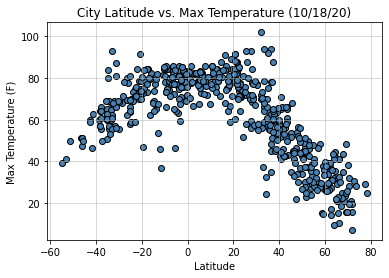

In [15]:
# Create Latitude vs Temperature scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Set title
plt.title("City Latitude vs. Max Temperature (10/18/20)")

# Set x axis Label
plt.xlabel("Latitude")

# Set y axis Label
plt.ylabel("Max Temperature (F)")

# Set grid lines
plt.grid(linestyle= '-', linewidth=1, alpha = 0.5)

# Save the scatter plot as .png in Images folder
plt.savefig("Images/City Latitude vs Max Temperature.png")

- It looks like the cities that are around 0 Latitude have the highest temperatures and the farther away the cities are from 0 Latitude, whether it is in the Northern or Southern Hemisphere, the temperature decreases. 

## Latitude vs. Humidity Plot

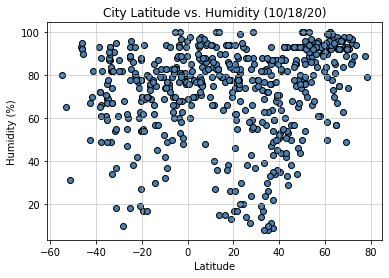

In [16]:
# Create Latitude vs Humidity scatter plot 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Set Title 
plt.title("City Latitude vs. Humidity (10/18/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid lines 
plt.grid(linestyle= '-', linewidth=1, alpha = 0.5)

# Save scatter plot as .png in Images Folder
plt.savefig("Images/City Latitude vs Humidity.png")

- It looks like there is a equal spread among the cities regarding humidity and latitude but the cities that are farther away from 0 Latitude in the Northern Hemisphere seem to a higher percentage in humidity. 

## Latitude vs. Cloudiness Plot

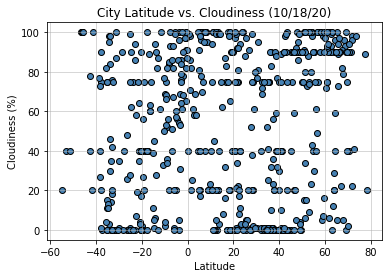

In [17]:
# Create Latitude vs Cloudiness scatter plot 
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Set title
plt.title("City Latitude vs. Cloudiness (10/18/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid lines 
plt.grid(linestyle= '-', linewidth=1, alpha = 0.5)

# Save scatter plot as .png in Images Folder
plt.savefig("Images/City Latitude vs Cloudiness.png")

- Latitude does not seem to be a factor on the cloudiness percentage in the cities. Cloudiness is widely spread no matter where the cities are.

## Latitude vs. Wind Speed Plot

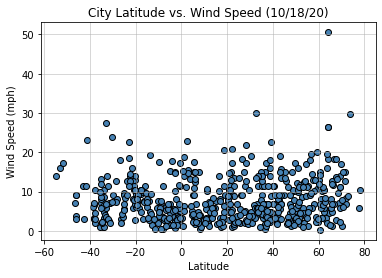

In [18]:
# Create Latitude vs Wind Speed scatter plot 
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Set title
plt.title("City Latitude vs. Wind Speed (10/18/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Set grid lines 
plt.grid(linestyle= '-', linewidth=1, alpha = 0.5)

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/City Latitude vs Wind Speed.png")

- Wind speed is widely spread across the latitude no matter what half of the hemisphere you are on. 

## Linear Regression

In [22]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"] >=0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

# Define Function for Linear Regression and Scatter Plot
def linear_regression(x,y):
    print(f"The r-value is: {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x, regress_values, "r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq, (a,b), fontsize=15, color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.88


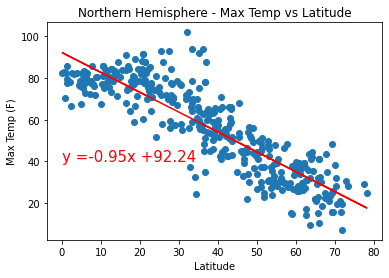

In [48]:
# Assign Variables for the Linear Regression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Add Annotation of Linear Regression Equation on the graph
annotate(equation, 0, 40)

# Set Title
plt.title("Northern Hemisphere - Max Temp vs Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temp (F)")

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/Max Temp vs Latitude Northern Hemp.png")

- There is a strong  and negative correlation between latitude and max temperature for the northern hemisphere. The negative r value shows the negative correlation and because the r value is closer to 1.00 it shows the strong correlation between these two variables. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6


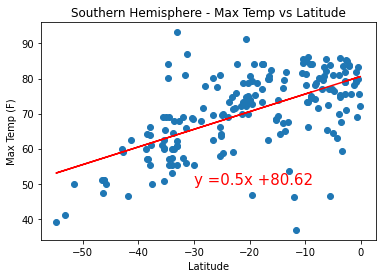

In [49]:
# Assign Variables for the Linear Regression
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# Add Annotation of Linear Regression Equation on the graph
annotate(equation, -30, 50)

# Set Title
plt.title("Southern Hemisphere - Max Temp vs Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temp (F)")

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/Max Temp vs Latitude Southern Hemp.png")

- There is a moderate and positive correlation between latitude and max temperature for the southern hemisphere. The positive r value shows the positive correlation and because the r value is near .50 it shows the moderate correlation between these two variables. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21


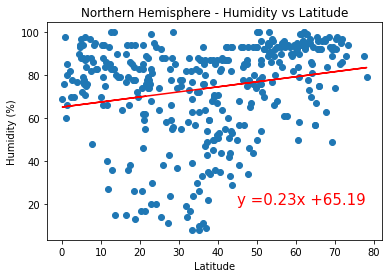

In [50]:
# Assign Variables for the Linear Regression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Add Annotation of Linear Regression Equation on the graph
annotate(equation, 45, 20)

# Set Title
plt.title("Northern Hemisphere - Humidity vs Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/Humidity vs Latitude Northern Hemp.png")

- There is a very weak and positive correlation between latitude and humidity for the northern hemisphere. The positive r value shows the positive correlation and because the r value is closer to 0.0 it shows the weak correlation between these two variables. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06


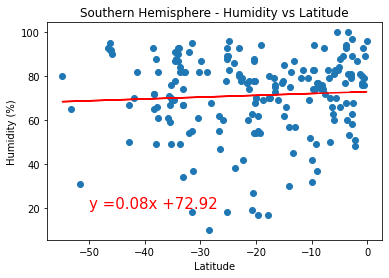

In [51]:
# Assign Variables for the Linear Regression
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Add Annotation of Linear Regression Equation on the graph
annotate(equation, -50, 20)

# Set Title
plt.title("Southern Hemisphere - Humidity vs Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/Humidity vs Latitude Southern Hemp.png")

- There is a very weak and positive correlation between latitude and humidity for the southern hemisphere. The positive r value shows the positive correlation and because the r value is closer to 0.0 it shows the weak correlation between these two variables. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.15


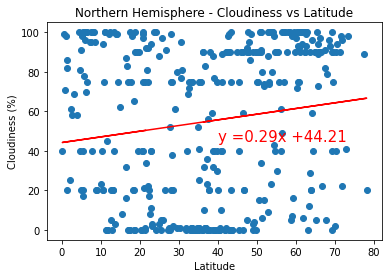

In [52]:
# Assign Variables for the Linear Regression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Add Annotation of Linear Regression Equation on the graph
annotate(equation, 40, 45)

# Set Title
plt.title("Northern Hemisphere - Cloudiness vs Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/Cloudiness vs Latitude Northern Hemp.png")

- There is a very weak and positive correlation between latitude and cloudiness for the northern hemisphere. The positive r value shows the positive correlation and because the r value is closer to 0.0 it shows the weak correlation between these two variables. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21


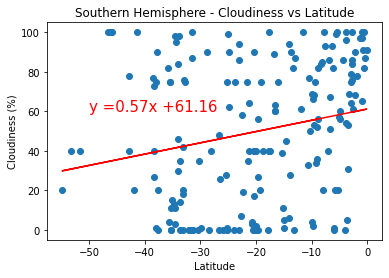

In [53]:
# Assign Variables for the Linear Regression
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Add Annotation of Linear Regression Equation on the graph
annotate(equation, -50, 60)

# Set Title
plt.title("Southern Hemisphere - Cloudiness vs Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/Cloudiness vs Latitude Southern Hemp.png")

- There is a very weak and positive correlation between latitude and cloudiness for the southern hemisphere. The positive r value shows the positive correlation and because the r value is closer to 0.0 it shows the weak correlation between these two variables. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15


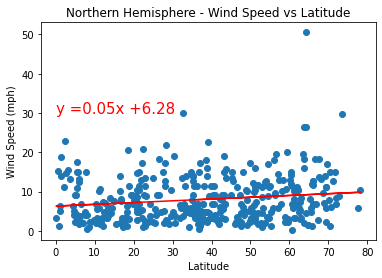

In [54]:
# Assign Variables for the Linear Regression
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Add Annotation of Linear Regression Equation on the graph
annotate(equation, 0, 30)

# Set Title
plt.title("Northern Hemisphere - Wind Speed vs Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/Wind Speed vs Latitude Northern Hemp.png")

- There is a very weak and positive correlation between latitude and wind speed for the northern hemisphere. The positive r value shows the positive correlation and because the r value is closer to 0.0 it shows the weak correlation between these two variables. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2


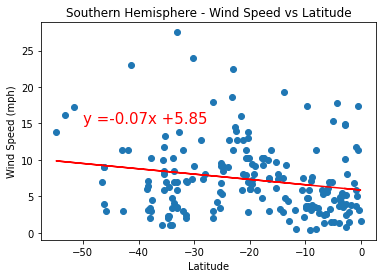

In [55]:
# Assign Variables for the Linear Regression
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Add Annotation of Linear Regression Equation on the graph
annotate(equation, -50, 15)

# Set Title
plt.title("Southern Hemisphere - Wind Speed vs Latitude")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (mph)")

# Save scatter plot as .png in Images Folder 
plt.savefig("Images/Wind Speed vs Latitude Southern Hemp.png")

- There is a very weak and negative correlation between latitude and cloudiness for the southern hemisphere. The negative r value shows the negative correlation and because the r value is closer to 0.0 it shows the weak correlation between these two variables. 